# Ecuación de Stiff

**Autor:** Felix Alberto Nieto García

**Lenguaje:** Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Sistema de ecuaciones de diferenciales**

$ \dot{\vec{y}} = \textbf{M} \vec{y} $   donde  $ \textbf{M}= \begin{pmatrix}
-100 & 1\\
0 & -1/10
\end{pmatrix} $ y con condición inicial $ \vec{y}_0 =   \begin{pmatrix}
1 \\
\frac{999}{10}
\end{pmatrix} $

**Eigenvalores**

$\textbf{M} -\lambda\textbf{I}  = \frac{1}{10}(10 \lambda ^2 + 1001 \lambda +100) = (\lambda +100)(\lambda + 1/10)=0$

$\lambda _1 =-100$ y $\lambda_2 = -1/10$ 

**Solución**

$\vec{y}=\textbf{V}\textbf{D}\textbf{V}^{-1} \vec{y}_0$

con
 $ \textbf{D}= \begin{pmatrix}
e^{-100t} & 1\\
0 & e^{-t/10}
\end{pmatrix} $
$ \textbf{V}= \begin{pmatrix}
1 & 1\\
0 & 999/10
\end{pmatrix} $
 $ \textbf{V}^{-1}=  \frac{10}{999} \begin{pmatrix}
999/10 & -1\\
0 & 1
\end{pmatrix} $

entonces llegamos a la solución 

$ \boxed{ \vec{y}(t) = e^{-t/10} \begin{pmatrix}
   1\\
\frac{999}{10}
\end{pmatrix}} $

In [ ]:
#Solución y(t) = (y1,y2)
def Sol(t): 
    return (np.exp(-t/10) , 999/10*np.exp(-t/10))

**Aproximación Euler**

$\vec{y}_{n+1} =  \vec{y}_n +h\vec{F}(\vec{y}_n,t_n) \vec{y}_n=\vec{y}_n +  h \textbf{M}^n  \vec{y}_n =
(\textbf{I}+h\textbf{M})\vec{y}_n $

$ \boxed{\vec{y}_{n+1} = (\textbf{I}+h\textbf{M})\vec{y}_n }$

sustituyendo los n pasos anteriores obtenemos

$\vec{y}_1 = (\textbf{I}+h \textbf{M}) \cdot \vec{y}_0$

$\vec{y}_2 = (\textbf{I}+h \textbf{M}) \underbrace{(\textbf{I}+h \textbf{M}) \cdot \vec{y}_0}_{\vec{y}_1} = (\textbf{I}+h \textbf{M})^2 \cdot \vec{y}_0  $

entonces para el n-ésimo paso

$\vec{y}_n = (\textbf{I}+h \textbf{M})^n \cdot \vec{y}_0$

Utilizando las relaciones $\textbf{I} = \textbf{V} \textbf{V}^{-1} $ ,$\textbf{M} = \textbf{V} \textbf{ A} \textbf{V}^{-1} $   donde  $\textbf{ A}$ es la matriz diagonalizada y $\textbf{V}$ es la matriz formada por los eigenvectores 



$\vec{y}_n = (\textbf{I}+h \textbf{M})^n \cdot \vec{y}_0 =  (\textbf{V} \textbf{V}^{-1}+h  \textbf{V} \textbf{ A} \textbf{V}^{-1})^n \cdot \vec{y}_0 = \underbrace{\textbf{V}(\textbf{I}+h   \textbf{ A} )\textbf{V}^{-1}\textbf{V}(\textbf{I}+h   \textbf{ A} )\textbf{V}^{-1}...\textbf{V}(\textbf{I}+h   \textbf{ A} )\textbf{V}^{-1} }_{n-veces}\cdot \vec{y}_0$

llegamos a

$ \vec{y}_n= (\textbf{V} (\textbf{I}+h\textbf{A})^n\textbf{V}^{-1})  \cdot \vec{y}_0 $
donde
$(\textbf{I}+h\textbf{A})^n = \begin{pmatrix}
(1 +h\lambda_1)^n & 0 \\
0 & (1+h \lambda_2)^n
\end{pmatrix} $


**Aplicando condiciones**

Utilizando los eigenvalores eigenvectores obtenemos

$(\textbf{I}+h\textbf{A})^n = \begin{pmatrix}
(1-100h)^n & 0 \\
0 & (1-h/10)^n
\end{pmatrix} $

$ \vec{y}_n= \begin{pmatrix}
1 & 1\\
0 & 999/10
\end{pmatrix} \begin{pmatrix}
(1-100h)^n & 0 \\
0 & (1-h/10)^n
\end{pmatrix}   \frac{10}{999} \begin{pmatrix}
999/10 & -1\\
0 & 1
\end{pmatrix}\begin{pmatrix}
1 \\
\frac{999}{10}
\end{pmatrix} $

Finalmente  llegamos a la aproximación

$ \boxed{ \vec{y}_n= (1- h/10)^n  \begin{pmatrix}
1 \\
999/10  
\end{pmatrix}} $

$ \vec{y}_{n+1} = (\textbf{I}+h\textbf{M})\vec{y}_n $

$ \vec{y}_{n+1} = \begin{pmatrix}
1-h100 & h \\
0 & 1-h/10 \\
\end{pmatrix} \vec{y}_n $

In [ ]:
#Aproximación con euler en terminos de la matriz M y el paso h
def Euler(t,h,Y0):
    y1 =  np.zeros(len(t))
    y2 =  np.zeros(len(t))
    y1[0] = Y0[0]
    y2[0] = Y0[1]
    for i in np.arange(1,len(t)):
        y1[i] = (1-h*100)*y1[i-1] +h*y2[i-1]  #Aproximación
        y2[i] = (1-h/10)*y2[i-1] 
    return y1,y2

#Aproximación con euler en terminos del paso h
def Eulerh(t,h,Y0): 
    y1 = np.zeros(len(t))
    y2 = np.zeros(len(t))
    y1[0] = Y0[0]
    y2[0] = Y0[1]
    
    for i in np.arange(1,len(t)):
        M = (1-h/10)**i
        y1[i] = M
        y2[i] = M * 999/10
    return y1,y2

**Aproximación con el método del trapecio**

$\vec{y}_{n+1}= \vec{y}_n +\frac{1}{2}h\left[ \vec{F}(\vec{y}_n,t_n)+ \vec{F}(\vec{y}_{n+1},t_{n+1})\right] =
\vec{y}_n +\frac{1}{2}h\left[\textbf{M} \vec{y}_n+   \textbf{M} \vec{y}_{n+1}\right]  $

$ \left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) \vec{y}_{n+1}=  \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right) \vec{y}_n  $

aplicando la inversa por la derecha 

$ \boxed{\vec{y}_{n+1}= \left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right) \vec{y}_n } $

veamos ahora 

$ \vec{y}_{1}= \left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right) \vec{y}_0  $

$ \vec{y}_{2}= \left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right)  \underbrace{\left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right) \vec{y}_{0} }_{\vec{y}_1}  $

podemos definir 
$  \textbf{B}=   \left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right) $ entonces
$ \vec{y}_{2}= \textbf{B}^2 \vec{y}_{0} $

Entonces para el n-ésimo paso tenemos  $ \vec{y}_{n}= \textbf{B}^n \vec{y}_{0} $

utilizando $\textbf{M} = \textbf{V} \textbf{ A} \textbf{V}^{-1} = \textbf{V}^{-1} \textbf{ A} \textbf{V} $, 
$ \textbf{I}  =\textbf{V}  \textbf{V}^{-1} =  \textbf{V}^{-1}\textbf{V} $ podemos rescribir a  $\textbf{B} $ como

$  \textbf{B}= \left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right)
= \left( \textbf{V}^{-1}\textbf{V} - \frac{1}{2}h  \textbf{V}^{-1} \textbf{ A} \textbf{V} \right) ^{-1} 
\left( \textbf{V}\textbf{V}^{-1} +\frac{1}{2}h \textbf{V} \textbf{ A} \textbf{V}^{-1} \right)=
\textbf{V} \left( \textbf{I} - \frac{1}{2}h    \textbf{ A}  \right) ^{-1} \textbf{V}^{-1}
\textbf{V}\left( \textbf{I} +\frac{1}{2}h \textbf{ A}  \right)\textbf{V}^{-1}
=\textbf{V} \left( \textbf{I} - \frac{1}{2}h    \textbf{ A}  \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{ A}  \right)\textbf{V}^{-1}$

para el n-ésimo paso
$ \vec{y}_n = \underbrace{\textbf{V} \left( \textbf{I} - \frac{1}{2}h    \textbf{ A}  \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{ A}  \right)\textbf{V}^{-1}\textbf{V} \left( \textbf{I} - \frac{1}{2}h    \textbf{ A}  \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{ A}  \right)\textbf{V}^{-1}...\textbf{V} \left( \textbf{I} - \frac{1}{2}h    \textbf{ A}  \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{ A}  \right)\textbf{V}^{-1}}_{n-veces} \vec{y}_0 $

ahora definiendo 

$  \textbf{C} =   \left( \textbf{I} - \frac{1}{2}h    \textbf{ A}  \right) ^{-1} 
\left( \textbf{I} +\frac{1}{2}h \textbf{ A}  \right) $ obtenemos 
$ \vec{y}_{n}=\textbf{V} \textbf{C}^n \textbf{V}^{-1} \vec{y}_{0} $

desarrollando $\textbf{C}$ obtenemos 

$
\textbf{C}= 
\begin{pmatrix}
1-\lambda _1 h/2 & 0 \\
0 & 1-\lambda _2 h/2 
\end{pmatrix} ^{-1}
\begin{pmatrix}
1+\lambda _1 h/2 & 0 \\
0 & 1+\lambda _2 h/2 
\end{pmatrix} =
\begin{pmatrix}
  \frac{1+\lambda _1 h/2}{1-\lambda _1 h/2}  & 0 \\
0 & \frac{1+\lambda _2 h/2}{1-\lambda _2 h/2}
\end{pmatrix}
$ 

Entonces para el paso $n$

$ \vec{y}_{n}= \textbf{V} \textbf{C}^n \textbf{V}^{-1}  \vec{y}_{0}  $ donde $\textbf{C}^n=  
\begin{pmatrix}
  \left(\frac{1+\lambda _1 h/2}{1-\lambda _1 h/2}\right)^n  & 0 \\
0 & \left(\frac{1+\lambda _2 h/2}{1-\lambda _2 h/2} \right)^n
\end{pmatrix}
$

**Aplicando condiciones**

Utilizando los eigenvalores eigenvalores y eigenvectores obtenemos

$\textbf{C}^n=  
\begin{pmatrix}
  \left(\frac{1-50 h}{1+50 h}\right)^n  & 0 \\
0 & \left(\frac{1- h/20}{1+h/20} \right)^n
\end{pmatrix}
$

 $\vec{y}_{n}=\textbf{V} \textbf{B}^n \textbf{V}^{-1}  \vec{y}_{0} = \begin{pmatrix}
1 & 1\\
0 & 999/10
\end{pmatrix}  \begin{pmatrix}
\left( \frac{1-50 h}{1+50 h} \right)^n & 0 \\
0 & \left( \frac{1- h/20}{1+ h/20}\right)^n
\end{pmatrix} \frac{10}{999} \begin{pmatrix}
999/10 & -1\\
0 & 1
\end{pmatrix} \begin{pmatrix}
1 \\
\frac{999}{10}
\end{pmatrix}    $

Finalmente llegamos a la aproximación

$\boxed{ \vec{y}_{n}=  \left( \frac{1- h/20}{1+ h/20}\right)^n
\begin{pmatrix}
 1   \\
\frac{999}{10} 
\end{pmatrix} }   $


$ \vec{y}_{n+1}= \left( \textbf{I} - \frac{1}{2}h  \textbf{M} \right) ^{-1} \left( \textbf{I} +\frac{1}{2}h \textbf{M} \right) \vec{y}_n  $

$\left( \textbf{I} +\frac{1}{2}h \textbf{M} \right) = \begin{pmatrix}
1-h50 & h/2 \\
0 & 1-h/20 \\
\end{pmatrix} $

$\left( \textbf{I} -\frac{1}{2}h \textbf{M} \right) = \begin{pmatrix}
1+h50 & -h/2 \\
0 & 1+h/20 \\
\end{pmatrix} $

$\left( \textbf{I} -\frac{1}{2}h \textbf{M} \right)^{-1} = \begin{pmatrix}
1+h/20 & h/2 \\
0 &  1+h50\\
\end{pmatrix} \frac{1}{(1+h/20)(1+h50)} $

$ \vec{y}_{n+1}=\begin{pmatrix}
\frac{1-h50}{1+h50} & \frac{h/2}{(1+h/20)(1+h50)} \\
0 & \frac{1-h/20}{1+h/20} \\
\end{pmatrix}  \vec{y}_n  $


In [ ]:
#Aproximación en terminos de la matriz M y el paso h
def Trapezoide(t,h,Y0):
    y1 =  np.zeros(len(t))
    y2 =  np.zeros(len(t))
    y1[0] = Y0[0]
    y2[0] = Y0[1]
    det =(1+h/20)*(1+h*50)
    a= (1-h*50)/(1+h*50)
    b= h/det
    d= (1-h/20)/(1+h/20)
    for i in np.arange(1,len(t)):
        y1[i] = a*y1[i-1] +b*y2[i-1]  #Aproximación
        y2[i] = d*y2[i-1] 
    return y1,y2

#Aproximación en terminos  del paso h
def Trapezoideh(t,h,Y0):
    y1 = np.zeros(len(t))
    y2 = np.zeros(len(t))
    y1[0]=Y0[0]
    y2[0]=Y0[1]
    
    for i in np.arange(0,len(t)):
        M = ((1-h/20)/(1+h/20))**i
        y1[i] = M
        y2[i] = M * 999/10
    return y1,y2

### Graficación de los algoritmos

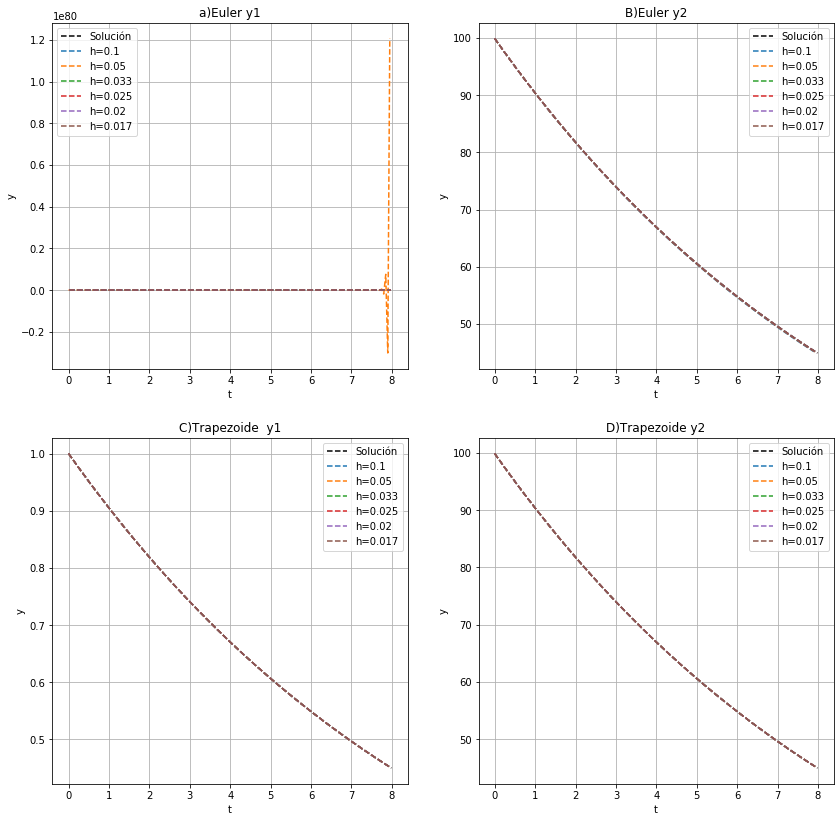

In [ ]:
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2,2,1) #Solución y aproximaciones primera entrada
ax2 = plt.subplot(2,2,2)  #Solución y aproximaciones segunda entrada
ax3 = plt.subplot(2,2,3) 
ax4 = plt.subplot(2,2,4)

#condiciones iniciales
Y0 = [1,999/10]
t0 = 0
tf = 20

hs = [1/10, 1/20,1/30,1/40,1/50,1/60]

#Solución
t = np.arange(x0,xf,0.01)
S1, S2 = Sol(t)

ax1.plot(t,S1,'--k',label='Solución')
ax2.plot(t,S2,'--k',label='Solución')
ax3.plot(t,S1,'--k',label='Solución')
ax4.plot(t,S2,'--k',label='Solución')


#Método de Euler
for i in  hs:
    t = np.arange(x0,xf,i)
    y1E,y2E = Euler(t,i,Y0)
    ax1.plot(t,y1E,'--',label=f'h={round(i,3)}')
    ax2.plot(t,y2E,'--',label=f'h={round(i,3)}')

#Método de trapezio
for i in hs:
    t = np.arange(x0,xf,i)
    y1T,y2T =  Trapezoide(t,i,Y0)
    ax3.plot(t,y1T,'--',label=f'h={round(i,3)}')
    ax4.plot(t,y2T,'--',label=f'h={round(i,3)}')
    
Titles= ["a)Euler y1", "B)Euler y2","C)Trapezoide  y1","D)Trapezoide y2"]
G =[ax1,ax2,ax3,ax4]
for i in range(len(G)) :
    G[i].set_title(Titles[i])
    G[i].grid()
    G[i].set_xlabel("t")
    G[i].set_ylabel("y")
    G[i].legend()

Se puede observar que la unica grafica con un salto abrupto es la grafica a), las demás aproxman bien la solución. El salto abrupto  se debe a que las ha consideradas no cumplen con la restricción de estabilidad dada por $h < 1/50$. Grafiquemos para el método de Euler la componente $y_1$

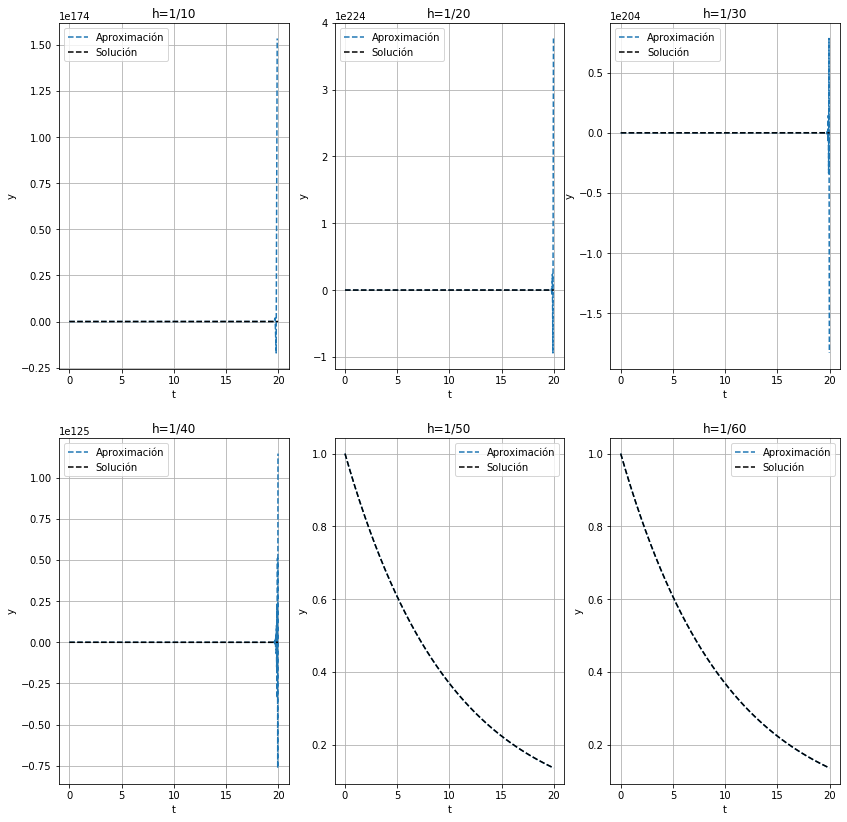

In [ ]:
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(2,3,1) #Solución y aproximaciones primera entrada
ax2 = plt.subplot(2,3,2)  #Solución y aproximaciones segunda entrada
ax3 = plt.subplot(2,3,3) #Solución y aproximaciones primera entrada
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#condiciones iniciales
Y0 = [1,999/10]
t0 = 0
tf = 20


hs = [1/10, 1/20,1/30,1/40,1/50,1/60]
G =[ax1,ax2,ax3,ax4,ax5,ax6]

tx = np.arange(t0,tf,0.01)
S1, S2 = Sol(tx)

Titles = ['1/10', '1/20','1/30','1/40','1/50','1/60']
for i in range(len(G)) :
    t = np.arange(t0,tf,hs[i])
    y1E,y2E = Euler(t,hs[i],Y0)
    G[i].plot(t,y1E,'--',label='Aproximación') #Aproximación
    G[i].plot(tx,S1,'--k',label='Solución') #Solución
    G[i].set_title('h='+Titles[i])
    G[i].grid()
    G[i].set_xlabel("t")
    G[i].set_ylabel("y")
    G[i].legend()

1. Se puede observar que para h>1/50 tenemos saltos abruptos, miestras que para h<1/50 se tiene una estabilidad para tiempos largos. Entonces se concluye que se cumple el criterio de estabilidad.
4. En el método del trapezoide no fue necesario h demasiado pequeñas para tener una buena aproximación, Mientras que el método de euler si.